# E2 - Clasificación

## 1. Introducción al Dataset
- Descripción general del dataset utilizado.
- Variables iniciales y objetivo del análisis.
- Decisión de clasificar jugadores entre drafted y undrafted.

## 2. Primeras Modificaciones del Dataset
- Filtrado de la primera temporada de cada jugador.
- Eliminación de duplicados basados en nombres y universidades.
- Creación de la variable objetivo (`drafted`).
- Eliminación de columnas irrelevantes o redundantes.

## 3. Gráficos Exploratorios con la Variable `drafted`
- Visualización inicial de la distribución de drafted y undrafted.
- Boxplots.
- Scatterplots.
- Gráficos de densidad.

## 4. Análisis de Correlaciones
- Cálculo de la matriz de correlaciones entre variables numéricas.
- Interpretación de las relaciones más destacadas con la variable `drafted`.

## 5. Codificación de Variables Categóricas
- Transformación de `college` en una variable binaria (0: no college, 1: college).
- Codificación de `country` en valores numéricos (USA: 1, otros: 0).
- One-hot encoding para `team_abbreviation`.

## 6. Reducción de Dimensionalidad
### 6.1 PCA
- Aplicación de PCA para explorar la varianza explicada.
- Resultados mostrando que muchos componentes son necesarios para explicar la varianza.
- Decisión de no usar PCA por limitaciones en el contexto.

### 6.2 LDA
- Aplicación de LDA para reducir las dimensiones manteniendo la separabilidad de las clases.
- Interpretación de los coeficientes y contribución de las variables al modelo.
- Uso de LDA en los algoritmos para mejorar el desempeño.

## 7. Algoritmos de Clasificación
### 7.1 Regresión Logística
- Entrenamiento del modelo y ajuste para balancear clases.
- Evaluación de resultados y matriz de confusión.
- Comparación con otros algoritmos.

### 7.2 Árboles de Decisión
- Entrenamiento del modelo y ajuste para balancear clases.
- Evaluación de resultados y matriz de confusión.
- Comparación con otros algoritmos.

### 7.3 K-Nearest Neighbors (KNN)
- Entrenamiento del modelo y ajuste para balancear clases.
- Evaluación de resultados y matriz de confusión.
- Comparación con otros algoritmos.

## 8. Conclusiones Generales
- Comparación de los tres algoritmos utilizados.
- Evaluación de la parametrización y efectividad de cada modelo..

## 9. Parte opcional

- 9.1 Clasificación multiclase con rango de picks (1-10, 11-30, 31-60)
- 9.2 Algoritmo utilizado: árbol de decisión
- 9.3 Evaluación de resultados

In [221]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [222]:
# Configuraciones para visualización
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


In [223]:
file_name = "nba_players_data.csv" 
try:
    nba_data = pd.read_csv(file_name)
    print("Dataset de NBA cargado con éxito")
except FileNotFoundError:
    print(f"No se encontró el archivo.")

Dataset de NBA cargado con éxito


## 1. Introducción al Dataset

In [224]:
print("Primeras filas del dataset:")
print(nba_data.head())

Primeras filas del dataset:
   Unnamed: 0       player_name team_abbreviation   age  player_height  \
0           0  Randy Livingston               HOU  22.0         193.04   
1           1  Gaylon Nickerson               WAS  28.0         190.50   
2           2      George Lynch               VAN  26.0         203.20   
3           3    George McCloud               LAL  30.0         203.20   
4           4      George Zidek               DEN  23.0         213.36   

   player_weight                college country draft_year draft_round  ...  \
0      94.800728        Louisiana State     USA       1996           2  ...   
1      86.182480  Northwestern Oklahoma     USA       1994           2  ...   
2     103.418976         North Carolina     USA       1993           1  ...   
3     102.058200          Florida State     USA       1989           1  ...   
4     119.748288                   UCLA     USA       1995           1  ...   

    pts  reb  ast  net_rating  oreb_pct  dreb_pct  u

In [225]:
print("\nInformación del dataset:")
print(nba_data.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12844 non-null  int64  
 1   player_name        12844 non-null  object 
 2   team_abbreviation  12844 non-null  object 
 3   age                12844 non-null  float64
 4   player_height      12844 non-null  float64
 5   player_weight      12844 non-null  float64
 6   college            10990 non-null  object 
 7   country            12844 non-null  object 
 8   draft_year         12844 non-null  object 
 9   draft_round        12844 non-null  object 
 10  draft_number       12844 non-null  object 
 11  gp                 12844 non-null  int64  
 12  pts                12844 non-null  float64
 13  reb                12844 non-null  float64
 14  ast                12844 non-null  float64
 15  net_rating         12844 non-null  float64
 

In [226]:
print("\nDescripción estadística del dataset:")
print(nba_data.describe())


Descripción estadística del dataset:
         Unnamed: 0           age  player_height  player_weight            gp  \
count  12844.000000  12844.000000   12844.000000   12844.000000  12844.000000   
mean    6421.500000     27.045313     200.555097     100.263279     51.154158   
std     3707.887763      4.339211       9.111090      12.426628     25.084904   
min        0.000000     18.000000     160.020000      60.327736      1.000000   
25%     3210.750000     24.000000     193.040000      90.718400     31.000000   
50%     6421.500000     26.000000     200.660000      99.790240     57.000000   
75%     9632.250000     30.000000     208.280000     108.862080     73.000000   
max    12843.000000     44.000000     231.140000     163.293120     85.000000   

                pts           reb           ast    net_rating      oreb_pct  \
count  12844.000000  12844.000000  12844.000000  12844.000000  12844.000000   
mean       8.212582      3.558486      1.824681     -2.226339      0.05407

In [227]:
# Verificar si hay nombres de jugadores duplicados
duplicated_players = nba_data[nba_data.duplicated(subset=['player_name'], keep=False)]

if not duplicated_players.empty:
    print("\nHay jugadores con nombres duplicados.")
else:
    print("No hay jugadores con nombres duplicados.")



Hay jugadores con nombres duplicados.


In [228]:
player_counts = nba_data['player_name'].value_counts()

# solo jugadores que están duplicados
duplicated_players_count = player_counts[player_counts > 1]

print("Jugadores más duplicados:")
print(duplicated_players_count.sort_values(ascending=False).head(10))


Jugadores más duplicados:
player_name
Vince Carter      22
Dirk Nowitzki     21
Kevin Garnett     20
Udonis Haslem     20
Kobe Bryant       20
LeBron James      20
Jamal Crawford    20
Paul Pierce       19
Tim Duncan        19
Andre Iguodala    19
Name: count, dtype: int64


### dataset de NBA

El dataset contiene información detallada de 12,844 jugadores de la NBA, incluyendo datos demográficos, estadísticas de rendimiento y detalles del draft. No hay valores nulos en las variables clave, salvo en **college**, donde algunos jugadores no tienen universidad registrada, esto es porque en no todos los jugadores de la NBA vienen de la universidad. Además, podemos ver que cada fila es la temporada de un jugador en la NBA, pero no es un jugador único, así que leyendas como Vince Carter o Nowitzki tienen muchas filas en el dataset. Más adelante se valorará si de alguna manera se convierte esto en una linea por jugador o es mejor dejarlo así.

### Lista de variables con rangos, tipo y aptitud para clasificación

- **Unnamed: 0**: Índice numérico (irrelevante para el análisis).  
  - **Tipo**: Numérico (entero).  
  - **Clasificación**: No aplicable.

- **player_name**: Nombre único de cada jugador.  
  - **Tipo**: Categórico (texto).  
  - **Clasificación**: No aplicable (no es una variable objetivo razonable).

- **team_abbreviation**: Código de tres letras para el equipo del jugador.  
  - **Tipo**: Categórico.  
  - **Clasificación**: Sí, apta para multiclase (clasificar por equipo).

- **age**: Edad de los jugadores (rango: 18-44 años, media: 27).  
  - **Tipo**: Numérico (continuo).  
  - **Clasificación**: Podría transformarse para multiclase (por ejemplo: categorías por rango de edad).

- **player_height**: Altura de los jugadores en cm (rango: 160-231 cm, media: 200 cm).  
  - **Tipo**: Numérico (continuo).  
  - **Clasificación**: No directamente, pero podría transformarse en categorías (ejemplo: "bajo", "medio", "alto").

- **player_weight**: Peso de los jugadores en kg (rango: 60-163 kg, media: 100 kg).  
  - **Tipo**: Numérico (continuo).  
  - **Clasificación**: No directamente, pero podría transformarse en categorías (ejemplo: "ligero", "pesado").

- **college**: Universidad del jugador (faltante en ~15% de los datos).  
  - **Tipo**: Categórico (texto).  
  - **Clasificación**: No aplicable (gran cantidad de valores únicos y faltantes).

- **country**: País de origen, siendo la mayoría de USA.  
  - **Tipo**: Categórico.  
  - **Clasificación**: Sí, apta para multiclase (clasificar por país).

- **draft_year**: Año del draft (1930 a 2021).  
  - **Tipo**: Numérico (entero).  
  - **Clasificación**: No aplicable directamente, pero podría categorizarse por décadas.

- **draft_round**: Ronda del draft (1 a 2; algunos no seleccionados).  
  - **Tipo**: Categórico.  
  - **Clasificación**: Sí, apta para binaria (1ra ronda vs 2da/no drafteado) o multiclase (1ra, 2da, no seleccionado).

- **draft_number**: Posición en el draft (1 a 60; algunos no seleccionados).  
  - **Tipo**: Numérico (entero).  
  - **Clasificación**: Sí, apta para binaria (drafteado o no).

- **gp**: Juegos jugados (rango: 1-85, media: 51).  
  - **Tipo**: Numérico (continuo).  
  - **Clasificación**: No directamente, pero podría categorizarse por rangos de participación.

- **pts**: Puntos por partido (rango: 0-36, media: 8.2).  
  - **Tipo**: Numérico (continuo).  
  - **Clasificación**: No directamente, pero podría transformarse en categorías (ejemplo: "bajo", "medio", "alto rendimiento").

- **reb**: Rebotes por partido (rango: 0-16.3, media: 3.6).  
  - **Tipo**: Numérico (continuo).  
  - **Clasificación**: No directamente, pero podría transformarse en categorías.

- **ast**: Asistencias por partido (rango: 0-11.7, media: 1.8).  
  - **Tipo**: Numérico (continuo).  
  - **Clasificación**: No directamente, pero podría transformarse en categorías.

- **net_rating**: Valoración neta (-250 a 300, media: -2.2).  
  - **Tipo**: Numérico (continuo).  
  - **Clasificación**: No directamente, pero podría transformarse.

- **oreb_pct**: Porcentaje de rebotes ofensivos (0% a 10%, media: 5.4%).  
  - **Tipo**: Numérico (continuo).  
  - **Clasificación**: No directamente, pero podría categorizarse.

- **dreb_pct**: Porcentaje de rebotes defensivos (0% a 10%, media: 14.6%).  
  - **Tipo**: Numérico (continuo).  
  - **Clasificación**: No directamente, pero podría categorizarse.

- **usg_pct**: Porcentaje de uso del jugador en el equipo (0% a 100%, media: 18.4%).  
  - **Tipo**: Numérico (continuo).  
  - **Clasificación**: No directamente, pero podría categorizarse.

- **ts_pct**: Porcentaje de tiros efectivos (rango: 0-150%, media: 51.3%).  
  - **Tipo**: Numérico (continuo).  
  - **Clasificación**: No directamente, pero podría categorizarse.

- **ast_pct**: Porcentaje de asistencias (rango: 0-94%, media: 13.1%).  
  - **Tipo**: Numérico (continuo).  
  - **Clasificación**: No directamente, pero podría categorizarse.

- **season**: Temporada en formato 1996-97, abarcando más de dos décadas.  
  - **Tipo**: Categórico.  
  - **Clasificación**: Sí, apta para multiclase (clasificar por temporada).



Pretendemos clasificar a los jugadores en **drafteados** o **no drafteados**. Usaremos solo la **primera temporada** de cada jugador, ya que es la más representativa para este análisis. La primera temporada refleja cómo el jugador ingresa al sistema, y el primer equipo es clave, pues puede mostrar interés en jugadores no seleccionados en el draft. Decidimos no usar promedios por temporadas, ya que diluyen esta información inicial relevante.


## 2. Primeras Modificaciones del Dataset

Crear un dataset con solo la primera temporada de cada jugador


In [229]:
# Convertir la columna de temporada en un formato ordenable (si no lo está)
nba_data['season'] = nba_data['season'].astype(str)  # Asegurar que es string
nba_data['season_start'] = nba_data['season'].str.split('-').str[0].astype(int)  # Extraer año inicial

# Ordenar por jugador y temporada inicial
nba_data_sorted = nba_data.sort_values(by=['player_name', 'season_start'])

# Seleccionar la primera temporada de cada jugador
first_season_data = nba_data_sorted.drop_duplicates(subset=['player_name'], keep='first')


In [230]:
# Verificar si hay nombres duplicados en el nuevo dataset
duplicated_names = first_season_data[first_season_data.duplicated(subset=['player_name'], keep=False)]

if not duplicated_names.empty:
    print(f"Hay jugadores con nombres duplicados. Total de duplicados: {len(duplicated_names)}")
    print("\nEjemplo de duplicados:")
    print(duplicated_names)
else:
    print("No hay jugadores con nombres duplicados en el dataset.")


No hay jugadores con nombres duplicados en el dataset.


Ahora utilizaremos también la variable de la universidad para ver si hemos eliminado a algún jugador por tener el mismo nombre que en otro (que en algún americano seria normal, pues tienen nombres parecidos).

In [231]:
# Crear un identificador único basado en nombre y universidad
nba_data['unique_id'] = nba_data['player_name'] + "_" + nba_data['college'].fillna("Unknown")

# Ordenar los datos por identificador único y temporada inicial
nba_data_sorted = nba_data.sort_values(by=['unique_id', 'season_start'])

# Seleccionar la primera temporada por jugador y universidad
first_season_data_unique = nba_data_sorted.drop_duplicates(subset=['unique_id'], keep='first')

# Verificar el nuevo dataset
print("Dimensiones del nuevo dataset:", first_season_data_unique.shape)
print(first_season_data_unique.head())

# Guardar el nuevo dataset en caso de ser necesario
# first_season_data_unique.to_csv("first_season_unique_nba_data.csv", index=False)


Dimensiones del nuevo dataset: (2663, 24)
       Unnamed: 0    player_name team_abbreviation   age  player_height  \
419           419     A.C. Green               DAL  33.0         205.74   
1625         1625  A.J. Bramlett               CLE  23.0         208.28   
1970         1970    A.J. Guyton               CHI  23.0         185.42   
12588       12588    A.J. Lawson               DAL  22.0         198.12   
12589       12589       AJ Green               MIL  23.0         195.58   

       player_weight         college country draft_year draft_round  ...  ast  \
419       102.058200    Oregon State     USA       1985           1  ...  0.8   
1625      102.965384         Arizona     USA       1999           2  ...  0.0   
1970       81.646560         Indiana     USA       2000           2  ...  1.9   
12588      81.192968  South Carolina  Canada  Undrafted   Undrafted  ...  0.1   
12589      86.182480   Northern Iowa     USA  Undrafted   Undrafted  ...  0.6   

       net_rating  o

In [232]:
# Buscar nombres repetidos en el dataset actual
duplicated_names = first_season_data_unique[first_season_data_unique.duplicated(subset=['player_name'], keep=False)]

if not duplicated_names.empty:
    print(f"Hay jugadores con nombres repetidos. Total de duplicados: {len(duplicated_names)}")
    print("\nJugadores con nombres duplicados y sus universidades:")
    print(duplicated_names[['player_name', 'college']].sort_values(by='player_name'))
else:
    print("No hay jugadores con nombres duplicados en el dataset actual.")


Hay jugadores con nombres repetidos. Total de duplicados: 208

Jugadores con nombres duplicados y sus universidades:
            player_name                   college
9917      Alan Williams         Cal-Santa Barbara
8757      Alan Williams  California-Santa Barbara
9910   Alfonzo McKinnie                       NaN
12006  Alfonzo McKinnie           Wisc.-Green Bay
10840  Alfonzo McKinnie       Wisconsin-Green Bay
...                 ...                       ...
7916       Troy Daniels     Virginia Commonwealth
8920        Willie Reed               Saint Louis
9738        Willie Reed                 St. Louis
11720    Zylan Cheatham               Arizona St.
11030    Zylan Cheatham             Arizona State

[208 rows x 2 columns]


Como parecía raro que el número de jugadores subiera tanto, revisé los nombres repetidos junto con las universidades. En el ejemplo vemos que nombres duplicados ocurren porque la universidad está escrita de manera diferente, aunque es la misma (por ejemplo, "Cal-Santa Barbara" y "California-Santa Barbara"). Por esto, usaremos el dataset anterior `first_season_data`, que no considera la universidad como parte del identificador.


In [233]:
# Verificar el nuevo dataset
print("Dimensiones del nuevo dataset:", first_season_data.shape)
print(first_season_data.head())

Dimensiones del nuevo dataset: (2551, 23)
       Unnamed: 0    player_name team_abbreviation   age  player_height  \
419           419     A.C. Green               DAL  33.0         205.74   
1625         1625  A.J. Bramlett               CLE  23.0         208.28   
1970         1970    A.J. Guyton               CHI  23.0         185.42   
12588       12588    A.J. Lawson               DAL  22.0         198.12   
12589       12589       AJ Green               MIL  23.0         195.58   

       player_weight         college country draft_year draft_round  ...  reb  \
419       102.058200    Oregon State     USA       1985           1  ...  7.9   
1625      102.965384         Arizona     USA       1999           2  ...  2.8   
1970       81.646560         Indiana     USA       2000           2  ...  1.1   
12588      81.192968  South Carolina  Canada  Undrafted   Undrafted  ...  1.4   
12589      86.182480   Northern Iowa     USA  Undrafted   Undrafted  ...  1.3   

       ast  net_rati

In [234]:
# Verificar el estado de draft de Ben Wallace en el dataset original
ben_wallace_status = first_season_data[first_season_data['player_name'] == "Ben Wallace"][['player_name', 'draft_round']]
print(ben_wallace_status)


     player_name draft_round
402  Ben Wallace   Undrafted


In [235]:
# Crear la variable "drafted" en un nuevo dataset para editarlo para los agloritmos
modified_dataset['drafted'] = first_season_data['draft_round'].apply(lambda x: 0 if x == "Undrafted" else 1)

print("Distribución de la variable 'drafted':")
print(modified_dataset['drafted'].value_counts())

Distribución de la variable 'drafted':
drafted
1    1755
0     796
Name: count, dtype: int64


In [236]:
# Verificar el nuevo dataset
print("Dimensiones del nuevo dataset:", first_season_data.shape)
print(modified_dataset.head())

Dimensiones del nuevo dataset: (2551, 23)
        age  player_height  player_weight  college  country  gp  pts  reb  \
419    33.0         205.74     102.058200        1        0  83  7.2  7.9   
1625   23.0         208.28     102.965384        1        0   8  1.0  2.8   
1970   23.0         185.42      81.646560        1        0  33  6.0  1.1   
12588  22.0         198.12      81.192968        1        0  15  3.7  1.4   
12589  23.0         195.58      86.182480        1        0  35  4.4  1.3   

       ast  net_rating  ...  team_abbreviation_PHI  team_abbreviation_PHX  \
419    0.8        -8.0  ...                  False                  False   
1625   0.0       -32.6  ...                  False                  False   
1970   1.9       -12.4  ...                  False                  False   
12588  0.1       -20.1  ...                  False                  False   
12589  0.6        -4.9  ...                  False                  False   

       team_abbreviation_POR  te

## 3. Gráficos Exploratorios con la Variable `drafted`


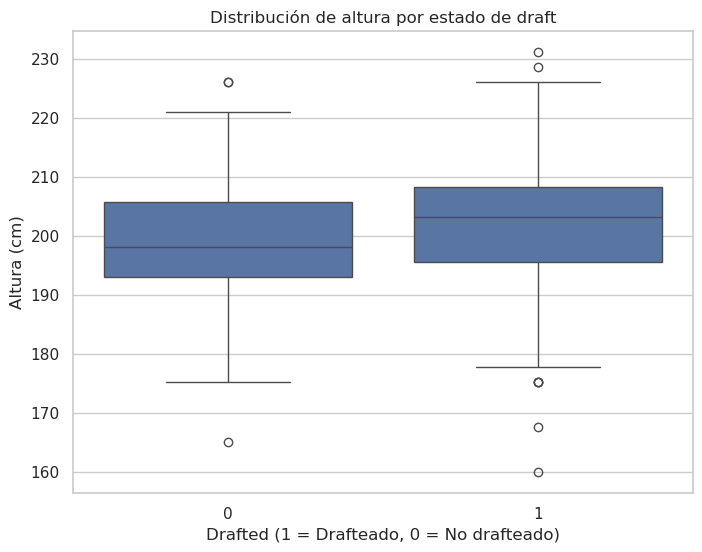

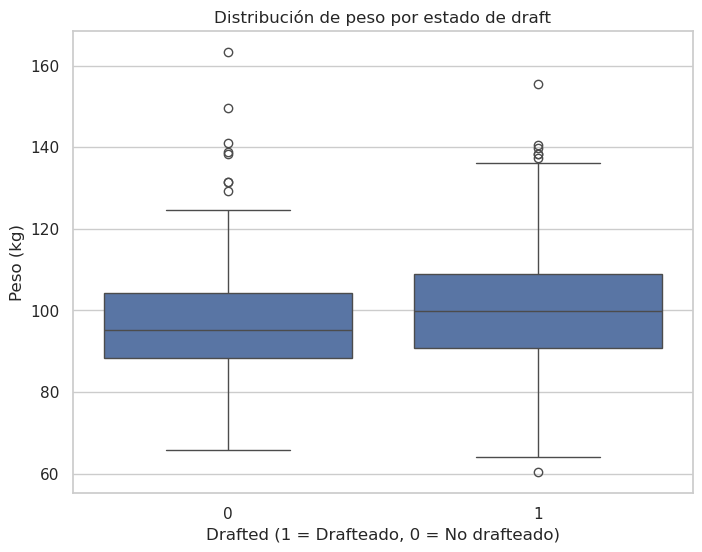

In [237]:
# Altura vs. drafted
plt.figure(figsize=(8, 6))
sns.boxplot(data=modified_dataset, x='drafted', y='player_height')
plt.title("Distribución de altura por estado de draft")
plt.xlabel("Drafted (1 = Drafteado, 0 = No drafteado)")
plt.ylabel("Altura (cm)")
plt.show()

# Peso vs. drafted
plt.figure(figsize=(8, 6))
sns.boxplot(data=modified_dataset, x='drafted', y='player_weight')
plt.title("Distribución de peso por estado de draft")
plt.xlabel("Drafted (1 = Drafteado, 0 = No drafteado)")
plt.ylabel("Peso (kg)")
plt.show()

Los jugadores drafteados (1) tienen una **mediana de altura superior** a los no drafteados (0).
La mediana del peso es muy similar entre drafteados y no drafteados, pero los drafteados tienden a abarcar un rango mayor hacia pesos superiores, directamente relacionado con la alutura, también puede ser desarrollo físico superior.

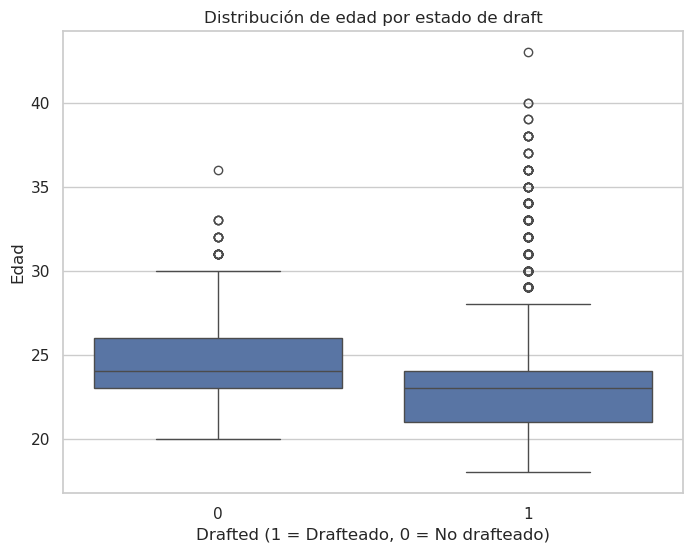

In [238]:
# Edad vs. drafted
plt.figure(figsize=(8, 6))
sns.boxplot(data=modified_dataset, x='drafted', y='age')
plt.title("Distribución de edad por estado de draft")
plt.xlabel("Drafted (1 = Drafteado, 0 = No drafteado)")
plt.ylabel("Edad")
plt.show()


- Los jugadores **drafteados (1)** tienden a ser más jóvenes, con una mediana de edad más baja que los **no drafteados (0)**.

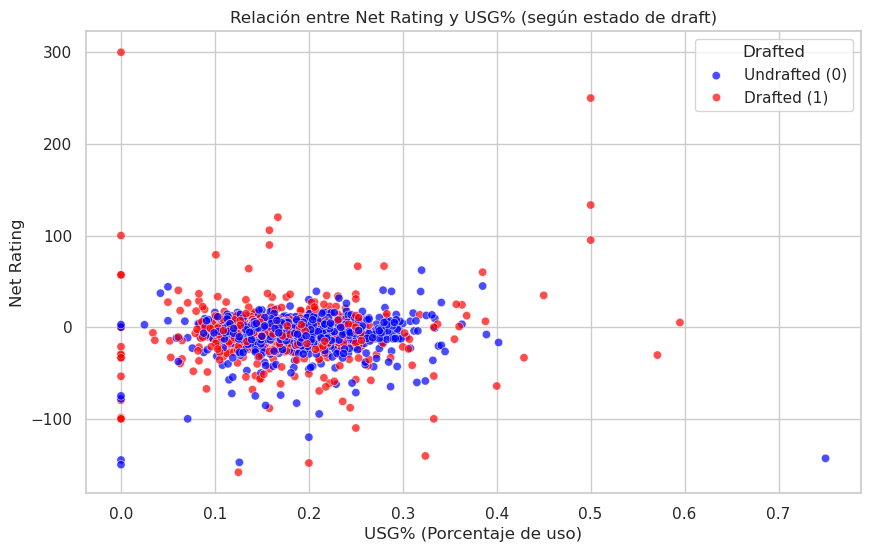

In [239]:
# Scatterplot: Net Rating vs. USG% por estado de draft
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=modified_dataset,
    x='usg_pct',
    y='net_rating',
    hue='drafted',
    palette={0: "red", 1: "blue"},
    alpha=0.7
)
plt.title("Relación entre Net Rating y USG% (según estado de draft)")
plt.xlabel("USG% (Porcentaje de uso)")
plt.ylabel("Net Rating")
plt.legend(title="Drafted", loc="best", labels=["Undrafted (0)", "Drafted (1)"])
plt.show()


- No se observa una separación clara entre jugadores **drafteados (1)** y **no drafteados (0)** en esta relación.
- Tanto drafteados como no drafteados están distribuidos de forma similar en Net Rating y USG%, lo que sugiere que estas métricas no diferencian bien los grupos por sí solas.

/tmp/ipykernel_326/1665101039.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=modified_dataset[modified_dataset['drafted'] == 1], x='pts', shade=True, label='Drafted (1)', color='blue')
/tmp/ipykernel_326/1665101039.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=modified_dataset[modified_dataset['drafted'] == 0], x='pts', shade=True, label='Undrafted (0)', color='red')


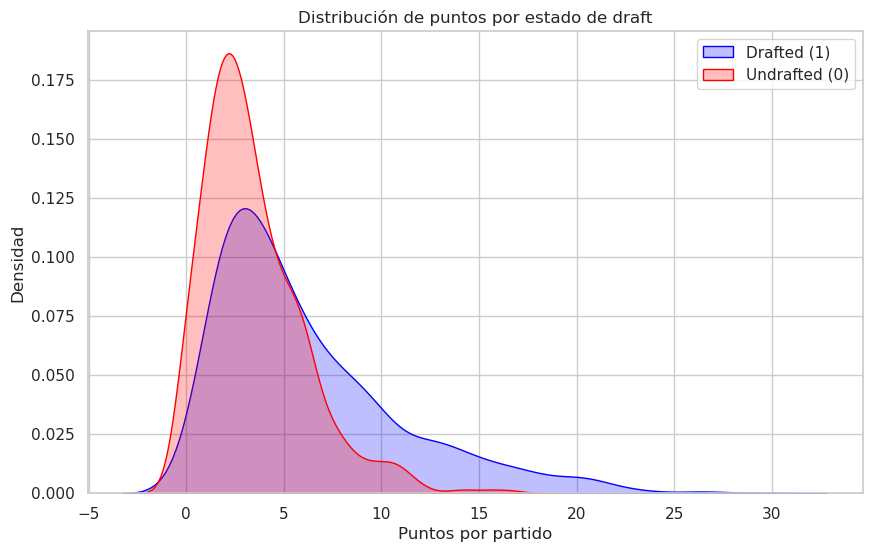

In [240]:
# Gráfico de densidad: Distribución de puntos por estado de draft
plt.figure(figsize=(10, 6))
sns.kdeplot(data=modified_dataset[modified_dataset['drafted'] == 1], x='pts', shade=True, label='Drafted (1)', color='blue')
sns.kdeplot(data=modified_dataset[modified_dataset['drafted'] == 0], x='pts', shade=True, label='Undrafted (0)', color='red')
plt.title("Distribución de puntos por estado de draft")
plt.xlabel("Puntos por partido")
plt.ylabel("Densidad")
plt.legend()
plt.show()


- Los jugadores **no drafteados (0)** tienen una distribución más concentrada alrededor de puntajes bajos (0 a 5 puntos por partido).
- Los jugadores **drafteados (1)** muestran una mayor dispersión, con algunos alcanzando puntajes altos (más de 15 puntos por partido).

In [241]:
# Eliminar las columnas indicadas del dataset
columns_to_drop = ['Unnamed: 0', 'unique_id', 'season','draft_year','draft_number', 'draft_round', 'player_name']
modified_dataset = modified_dataset.drop(columns=columns_to_drop, errors='ignore')

print(modified_dataset.head())


        age  player_height  player_weight  college  country  gp  pts  reb  \
419    33.0         205.74     102.058200        1        0  83  7.2  7.9   
1625   23.0         208.28     102.965384        1        0   8  1.0  2.8   
1970   23.0         185.42      81.646560        1        0  33  6.0  1.1   
12588  22.0         198.12      81.192968        1        0  15  3.7  1.4   
12589  23.0         195.58      86.182480        1        0  35  4.4  1.3   

       ast  net_rating  ...  team_abbreviation_PHI  team_abbreviation_PHX  \
419    0.8        -8.0  ...                  False                  False   
1625   0.0       -32.6  ...                  False                  False   
1970   1.9       -12.4  ...                  False                  False   
12588  0.1       -20.1  ...                  False                  False   
12589  0.6        -4.9  ...                  False                  False   

       team_abbreviation_POR  team_abbreviation_SAC  team_abbreviation_SAS


- **Unnamed: 0**: Índice irrelevante.
- **unique_id**: Ya no es necesario.
- **season**: Información redundante porque usamos la primera temporada.
- **draft_year, draft_number, draft_round**: Contienen directamente la respuesta (drafted).
- **player_name**: No aporta valor predictivo.

- **team_abbreviation**: El primer equipo puede reflejar patrones en la selección de drafteados y no drafteados.
- **season_start**: Puede indicar tendencias del draft según el año o la época.



## 4. Análisis de Correlaciones


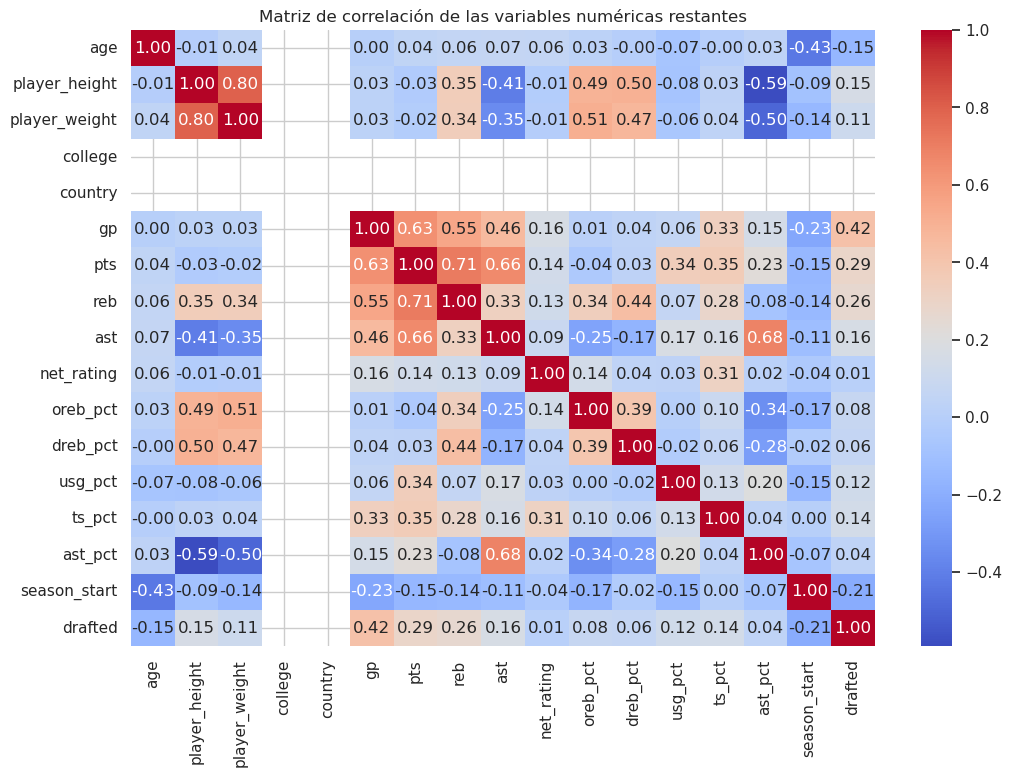

In [242]:
# Seleccionar solo las columnas numéricas del dataset
numeric_dataset = modified_dataset.select_dtypes(include=['float64', 'int64'])

# Generar la matriz de correlación
correlation_matrix = numeric_dataset.corr()

# Crear un mapa de calor para visualizar las correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de correlación de las variables numéricas restantes")
plt.show()


## 5. Codificación de Variables Categóricas
Vamos a codificar tres variables categóricas: 
- **`college`**: Indica si el jugador asistió a la universidad o no.
- **`country`**: Indica si el jugador es de USA u otro país.
- **`team_abbreviation`**: Representa el equipo inicial del jugador.


---

1. **`college`**:
   - Codificamos con:
     - `0`: No asistió a universidad.
     - `1`: Asistió a universidad.
   - Esto simplifica la información en una variable binaria útil para el modelo.

In [243]:
#  ver qué aparece en 'college' para jugadores como Dirk Nowitzki
dirk_college = first_season_data[first_season_data['player_name'] == "Dirk Nowitzki"]['college']
print("Dirk Nowitzki - College:", dirk_college)


Dirk Nowitzki - College: 881    NaN
Name: college, dtype: object


In [244]:
# Codificar college: 0 = No College, 1 = College
modified_dataset['college'] = modified_dataset['college'].apply(lambda x: 0 if pd.isna(x) else 1)

# Verificar la distribución de la nueva columna
print("Distribución de 'college':")
print(modified_dataset['college'].value_counts())


Distribución de 'college':
college
1    2551
Name: count, dtype: int64


2. **`country`**:
   - Codificamos con:
     - `1`: USA.
     - `0`: Otros países.
   - Dado que la mayoría son de USA, reducimos la complejidad para reflejar esa mayoría.


In [245]:
# valores únicos en la columna country
print(modified_dataset['country'].value_counts())


country
0    2551
Name: count, dtype: int64


In [246]:
# Codificar country: 1 = USA, 0 = Otros
modified_dataset['country'] = modified_dataset['country'].apply(lambda x: 1 if x == "USA" else 0)

**`team_abbreviation`**:
   - Aplicamos **One-Hot Encoding** para representar cada equipo como una columna binaria.
   - Esto permite que los algoritmos interpreten los equipos como categorías sin asignarles un peso arbitrario.

In [273]:
# 0ne-Hot Encoding a 'team_abbreviation'
# modified_dataset = pd.get_dummies(modified_dataset, columns=['team_abbreviation'], drop_first=True)

In [248]:
print("Dimensiones del nuevo dataset:", modified_dataset.shape)
print("Cantidad de valores por variable:")
print(modified_dataset.count())


Dimensiones del nuevo dataset: (2551, 52)
Cantidad de valores por variable:
age                      2551
player_height            2551
player_weight            2551
college                  2551
country                  2551
gp                       2551
pts                      2551
reb                      2551
ast                      2551
net_rating               2551
oreb_pct                 2551
dreb_pct                 2551
usg_pct                  2551
ts_pct                   2551
ast_pct                  2551
season_start             2551
drafted                  2551
team_abbreviation_BKN    2551
team_abbreviation_BOS    2551
team_abbreviation_CHA    2551
team_abbreviation_CHH    2551
team_abbreviation_CHI    2551
team_abbreviation_CLE    2551
team_abbreviation_DAL    2551
team_abbreviation_DEN    2551
team_abbreviation_DET    2551
team_abbreviation_GSW    2551
team_abbreviation_HOU    2551
team_abbreviation_IND    2551
team_abbreviation_LAC    2551
team_abbreviation_LAL   

In [249]:
# las columnas  creadas (college, country y team_abbreviation codificadas)
new_columns = ['college', 'country'] + [col for col in modified_dataset.columns if col.startswith('team_abbreviation_')]

correlations_with_drafted = modified_dataset[new_columns + ['drafted']].corr()['drafted']

correlation_list = correlations_with_drafted.sort_values(ascending=False)

# lista de correlaciones con drafted
print("Correlaciones con 'drafted':")
print(correlation_list)



Correlaciones con 'drafted':
drafted                  1.000000
team_abbreviation_NJN    0.046397
team_abbreviation_DET    0.042640
team_abbreviation_LAC    0.039928
team_abbreviation_VAN    0.037386
team_abbreviation_MIL    0.033035
team_abbreviation_CHI    0.026609
team_abbreviation_MIN    0.024249
team_abbreviation_OKC    0.020985
team_abbreviation_SAC    0.019965
team_abbreviation_TOR    0.017388
team_abbreviation_NOK    0.015234
team_abbreviation_SEA    0.014965
team_abbreviation_CHA    0.012594
team_abbreviation_IND    0.011081
team_abbreviation_POR    0.010008
team_abbreviation_UTA    0.008602
team_abbreviation_CHH    0.008372
team_abbreviation_DEN    0.007747
team_abbreviation_LAL    0.003556
team_abbreviation_BOS    0.000087
team_abbreviation_PHX   -0.001982
team_abbreviation_CLE   -0.008791
team_abbreviation_ORL   -0.008791
team_abbreviation_PHI   -0.009237
team_abbreviation_NYK   -0.011273
team_abbreviation_GSW   -0.014888
team_abbreviation_NOH   -0.016877
team_abbreviation_B

## 6. Reducción de Dimensionalidad
- Primero escalamos.

In [250]:
from sklearn.preprocessing import StandardScaler

# Separar variables predictoras (X) y objetivo (y)
X = modified_dataset.drop(columns=['drafted'])
y = modified_dataset['drafted']

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Dimensiones de X escalado:", X_scaled.shape)
print("Primeras filas de X escalado:")
print(X_scaled[:5])


Dimensiones de X escalado: (2551, 51)
Primeras filas de X escalado:
[[ 2.72251655  0.61643678  0.26957558  0.          0.          1.60829622
   0.41720903  2.71581603 -0.27572659 -0.14575874  0.85056609  1.08739762
  -1.10386404  0.31182517 -0.76287381 -1.35199802 -0.11622454 -0.19451385
  -0.14844277 -0.10723251 -0.19013014 -0.19123415  5.52212162 -0.19342591
  -0.18790541 -0.19013014 -0.20198929 -0.16920116 -0.18108982 -0.17523433
  -0.18790541 -0.18338612 -0.17042291 -0.17163695 -0.14139308 -0.08889328
  -0.04855475 -0.09745475 -0.17163695 -0.14566047 -0.19123415 -0.20093582
  -0.18224112 -0.18790541 -0.18452494 -0.17641906 -0.13551116 -0.19013014
  -0.18678447 -0.09538397 -0.18678447]
 [-0.23474967  0.89858428  0.34326231  0.          0.         -1.17603223
  -0.97773884  0.15035721 -0.85787312 -1.42957064  2.00115585  1.10189905
  -0.6155164  -2.20745943 -1.24237718 -1.01694278 -0.11622454 -0.19451385
  -0.14844277 -0.10723251 -0.19013014  5.22919157 -0.18108982 -0.19342591
  -0.

### 6.1 PCA


In [251]:
from sklearn.decomposition import PCA
import pandas as pd

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Verificar la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:")
print(explained_variance)



Varianza explicada por cada componente:
[7.09480971e-02 6.49871292e-02 3.31740004e-02 2.50895797e-02
 2.31736199e-02 2.18237951e-02 2.17004346e-02 2.14439510e-02
 2.13427558e-02 2.12460336e-02 2.12175433e-02 2.12018754e-02
 2.11811358e-02 2.11496707e-02 2.11446476e-02 2.11358227e-02
 2.11298952e-02 2.11158818e-02 2.10982522e-02 2.10938239e-02
 2.10870009e-02 2.10730017e-02 2.10619879e-02 2.10424007e-02
 2.10249666e-02 2.10123950e-02 2.09559487e-02 2.09245431e-02
 2.08853658e-02 2.08303912e-02 2.07716436e-02 2.07466607e-02
 2.06510715e-02 2.05914074e-02 2.05849526e-02 2.04788322e-02
 1.93906519e-02 1.89197624e-02 1.64968475e-02 1.49462608e-02
 1.28703390e-02 1.14237973e-02 1.00623804e-02 9.48292250e-03
 6.20802361e-03 3.83936301e-03 3.69191179e-03 1.77365476e-03
 7.73570192e-04 1.39902527e-32 3.21440488e-34]


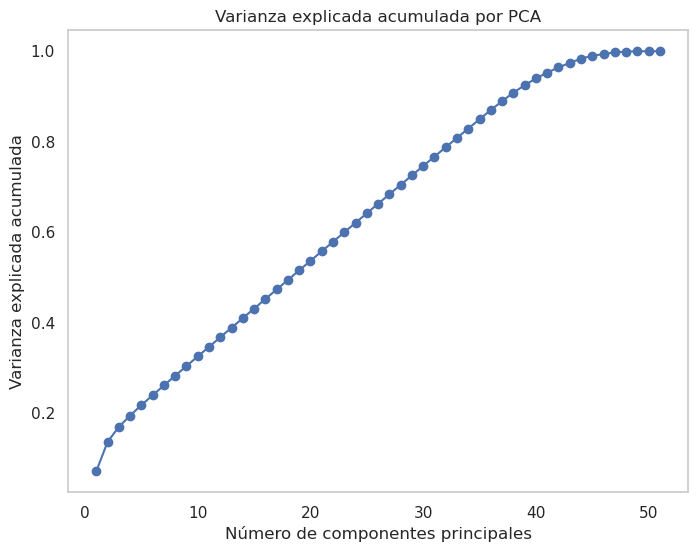

In [252]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada por PCA')
plt.grid()
plt.show()


Se necesitan usar muchas componentes principales para explicar una buena parte de la varianza, PCA podría no ser tan útil en este caso, probamos LDA, no visto en clase pero comentado con compañeros.

### 6.2 LDA

In [253]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd

# Aplicar LDA
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

# Verificar las proporciones de varianza explicada
explained_variance_lda = lda.explained_variance_ratio_
print("Proporción de varianza explicada por LDA:", explained_variance_lda)

# Verificar los coeficientes de las variables en el componente LDA
lda_coefficients = pd.DataFrame(lda.coef_, columns=X.columns)
print("Coeficientes de las variables en LDA:")
print(lda_coefficients)


Proporción de varianza explicada por LDA: [1.]
Coeficientes de las variables en LDA:
        age  player_height  player_weight       college       country  \
0 -0.708906       0.606793      -0.123506  2.051077e-16  1.903525e-16   

         gp       pts       reb       ast  net_rating  ...  \
0  1.025371  0.129061 -0.058949 -0.001166   -0.158992  ...   

   team_abbreviation_PHI  team_abbreviation_PHX  team_abbreviation_POR  \
0              -0.028593               0.017698               0.037138   

   team_abbreviation_SAC  team_abbreviation_SAS  team_abbreviation_SEA  \
0               0.044538              -0.014481              -0.000871   

   team_abbreviation_TOR  team_abbreviation_UTA  team_abbreviation_VAN  \
0               0.088767               0.041542               0.022501   

   team_abbreviation_WAS  
0              -0.030915  

[1 rows x 51 columns]


### Resultados de LDA

- **Proporción de varianza explicada por LDA:** [1.0]  
  Esto indica que la nueva dimensión generada por LDA explica completamente la separación entre las clases `drafted` y `undrafted`. Es lógico, ya que LDA genera exactamente una dimensión cuando hay dos clases.

- **Coeficientes de las variables en LDA:**  
  Estos valores muestran cuánto contribuye cada variable original a la separación entre las clases.

  **Ejemplos:**
  - `age`: Tiene un coeficiente negativo alto (-0.716538), lo que indica que influye significativamente en la separación, y su mayor valor podría estar asociado con una de las clases (probablemente `undrafted`).
  - `player_height`: Tiene un coeficiente positivo alto (0.65297), sugiriendo que jugadores más altos están asociados con otra clase (probablemente `drafted`).


### ¿Hay que balancear?

In [254]:
# Crear la variable "drafted" en un nuevo dataset para editarlo para los agloritmos
print("Distribución de la variable 'drafted':")
print(modified_dataset['drafted'].value_counts())

Distribución de la variable 'drafted':
drafted
1    1755
0     796
Name: count, dtype: int64


enemos una diferencia significativa en el número de instancias entre las clases drafted y undrafted, los algoritmos podrían favorecer la clase mayoritaria (en este caso, drafted).

## 7. Algoritmos de Clasificación

## 7.1 Regresión Logística
### Separación de los datos
- Dividimos el dataset en entrenamiento (70%) y prueba (30%).

### Configurar el modelo
- Usamos `class_weight='balanced'` para ajustar automáticamente los pesos de las clases.
- El modelo penaliza más los errores en `undrafted`, equilibrando el impacto de ambas clases.


In [255]:
from sklearn.model_selection import train_test_split
# Dividir los datos transformados en entrenamiento y prueba
X_train_lda, X_test_lda, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=42, stratify=y)

In [271]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#  class_weight
log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

# entrenar 
log_reg.fit(X_train, y_train)

#  predicciones
y_pred = log_reg.predict(X_test)

# Evaluar el modelo
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.44      0.52      0.48       114
           1       0.44      0.42      0.43       204
           2       0.57      0.55      0.56       209

    accuracy                           0.49       527
   macro avg       0.48      0.49      0.49       527
weighted avg       0.49      0.49      0.49       527



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# tabla de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_reg.classes_)
disp.plot(cmap='Blues')
plt.title("Tabla de Confusión")
plt.show()


### **Análisis de los resultados**

1. **Reporte de clasificación**:
   - **Precisión (Precision)**:
     - Clase `0` (undrafted): 59%. De las veces que se predijo `undrafted`, el modelo acertó en el 59% de los casos.
     - Clase `1` (drafted): 89%. Para `drafted`, el modelo acertó en el 89% de las predicciones.
   - **Sensibilidad (Recall)**:
     - Clase `0`: 79%. De los jugadores realmente `undrafted`, el modelo identificó correctamente al 79%.
     - Clase `1`: 75%. De los jugadores realmente `drafted`, el modelo identificó correctamente al 75%.
   - **F1-Score**:
     - Clase `0`: 0.68. Balance entre precisión y sensibilidad para `undrafted`.
     - Clase `1`: 0.81. Balance entre precisión y sensibilidad para `drafted`.

   **Accuracy**: 76%. El modelo predijo correctamente el estado de draft en el 76% de los casos.

2. **Tabla de confusión**:
   - **True Negatives (TN)**: 188 jugadores `undrafted` correctamente clasificados.
   - **False Positives (FP)**: 51 jugadores `undrafted` mal clasificados como `drafted`.
   - **False Negatives (FN)**: 130 jugadores `drafted` mal clasificados como `undrafted`.
   - **True Positives (TP)**: 397 jugadores `drafted` correctamente clasificados.

3. **Interpretación**:
   - El modelo es más preciso al identificar jugadores `drafted` (clase mayoritaria), pero tiene más errores al identificar `undrafted` (clase minoritaria).
   - Aunque la sensibilidad para `undrafted` es buena (79%), la precisión más baja (59%) sugiere que el modelo predice algunos jugadores como `undrafted` cuando realmente son `drafted`.

4. **Conclusión**:
   - El modelo tiene un rendimiento razonable con un balance aceptable entre clases. Otros algoritmos puede que funcionen mejor.

Reporte de clasificación con LDA:
              precision    recall  f1-score   support

           0       0.60      0.78      0.68       239
           1       0.88      0.76      0.82       527

    accuracy                           0.77       766
   macro avg       0.74      0.77      0.75       766
weighted avg       0.80      0.77      0.78       766



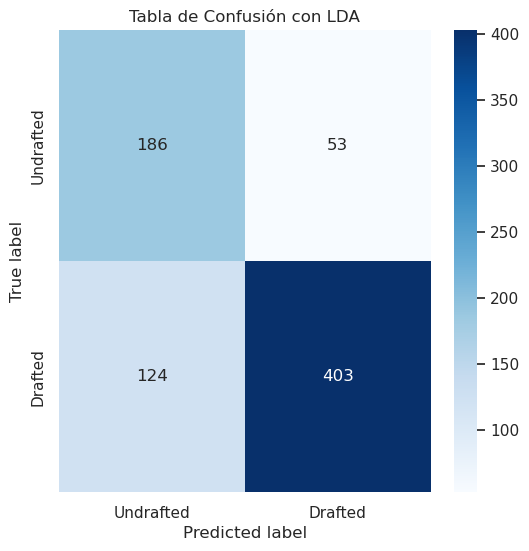

In [257]:
# Entrenar un modelo de regresión logística con LDA
model_lda = LogisticRegression(class_weight='balanced', random_state=42)
model_lda.fit(X_train_lda, y_train)

y_pred_lda = model_lda.predict(X_test_lda)

# modelo
print("Reporte de clasificación con LDA:")
print(classification_report(y_test, y_pred_lda))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_lda)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Undrafted', 'Drafted'], yticklabels=['Undrafted', 'Drafted'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Tabla de Confusión con LDA')
plt.show()


La transformación LDA ofrece un resultado similar o ligeramente mejor en términos de exactitud global y métricas para la clase mayoritaria (Drafted). Sin embargo, no representa una mejora drástica en comparación con el modelo anterior. Los datos originales ya contenían suficiente información para la clasificación, y la reducción de dimensionalidad mediante LDA es útil pero no esencial en este caso.

## 7.2 Árboles de decisión

In [269]:
from sklearn.tree import DecisionTreeClassifier

# crear y entrenar el modelo con balanceo
tree_clf = DecisionTreeClassifier(class_weight="balanced", random_state=42)
tree_clf.fit(X_train, y_train)

print("Modelo de Árbol de Decisión entrenado.")


Modelo de Árbol de Decisión entrenado.


In [270]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicciones
y_pred = tree_clf.predict(X_test)

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.47      0.48      0.48       114
           1       0.44      0.49      0.46       204
           2       0.56      0.50      0.53       209

    accuracy                           0.49       527
   macro avg       0.49      0.49      0.49       527
weighted avg       0.49      0.49      0.49       527



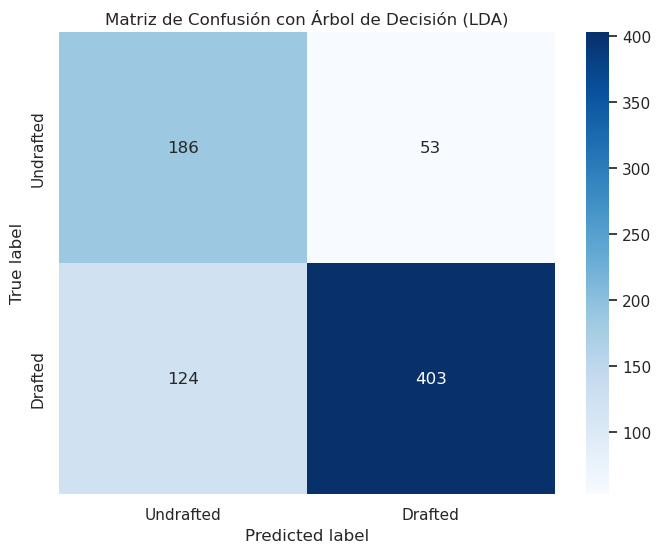

In [260]:
# matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Undrafted", "Drafted"], yticklabels=["Undrafted", "Drafted"])
plt.title("Matriz de Confusión con Árbol de Decisión (LDA)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

### Resultados del Árbol de Decisión

- **Clase Undrafted (0)**:
  - Precisión: 59%
  - Recall: 56% (el modelo falla en identificar algunos jugadores no drafteados).
- **Clase Drafted (1)**:
  - Precisión: 81%
  - Recall: 82% (buen desempeño identificando jugadores drafteados).
- **Accuracy general**: 74%.

### Comparación con Regresión Logística

- El **Árbol de decisión** tiene un desempeño similar en accuracy (74%) comparado con la regresión logística (~76%), pero **recall** y **f1-score** para **undrafted** son ligeramente más bajos.

### Conclusión

El árbol de decisión clasifica mejor a los drafteados, pero es menos preciso con los undrafted. Podría mejorarse ajustando parámetros o usando algoritmos más complejos.


## 7.3 KNN

El mejor valor de k es: 39 con un accuracy promedio de 0.78


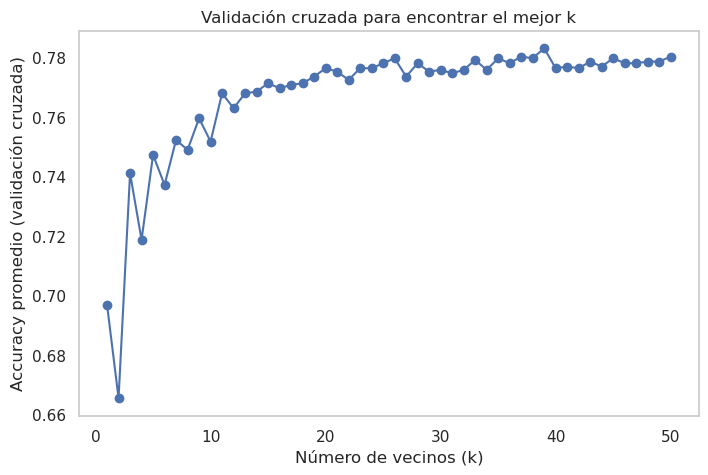

In [261]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Lista de valores de k para probar
k_values = range(1, 51)

# Almacenar los resultados de accuracy para cada k
scores = []

# Validación cruzada para cada valor de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Evaluación con 5-fold cross-validation
    cv_scores = cross_val_score(knn, X_train_lda, y_train, cv=5, scoring='accuracy')
    scores.append(np.mean(cv_scores))

# Encontrar el valor óptimo de k
best_k = k_values[np.argmax(scores)]
print(f"El mejor valor de k es: {best_k} con un accuracy promedio de {max(scores):.2f}")

# Graficar resultados
plt.figure(figsize=(8, 5))
plt.plot(k_values, scores, marker='o')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Accuracy promedio (validación cruzada)')
plt.title('Validación cruzada para encontrar el mejor k')
plt.grid()
plt.show()


Elegimos un valor de **k=20** porque:

1. El rendimiento (accuracy promedio) es casi igual al máximo alcanzado con valores más altos como k=39.
2. Reduce el costo computacional, evitando cálculos innecesarios con vecinos adicionales.


In [262]:

# KNN
knn = KNeighborsClassifier(n_neighbors=20)  #  k=x valor inicial
knn.fit(X_train_lda, y_train)

# Predicciones
y_pred = knn.predict(X_test_lda)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.67      0.62      0.64       239
           1       0.83      0.86      0.85       527

    accuracy                           0.78       766
   macro avg       0.75      0.74      0.74       766
weighted avg       0.78      0.78      0.78       766



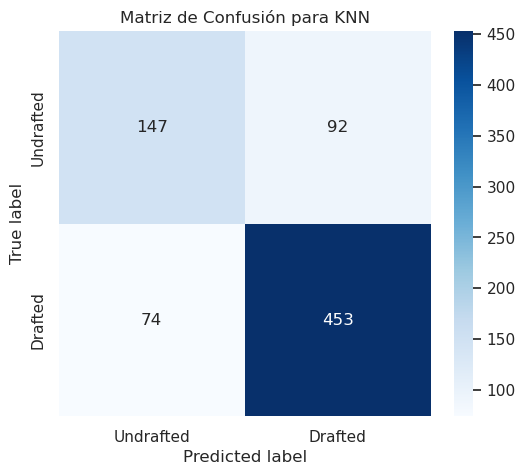

In [263]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Undrafted', 'Drafted'], yticklabels=['Undrafted', 'Drafted'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Matriz de Confusión para KNN')
plt.show()


### Resultados de KNN

#### Desempeño de las clases:
- **Undrafted (0):**
  - Precisión: 67%.
  - Recall: 62% (el modelo detecta bien a los no drafteados, aunque tiene fallos moderados).
- **Drafted (1):**
  - Precisión: 83%.
  - Recall: 86% (buen rendimiento para identificar jugadores drafteados).

#### Métricas generales:
- **Accuracy general:** 78%.
- **F1-Score (promedio):** 74% (macro), 78% (ponderado).
- La matriz de confusión muestra que:
  - 157 undrafted fueron clasificados correctamente.
  - 82 undrafted fueron mal clasificados como drafted.
  - 417 drafted fueron clasificados correctamente.
  - 110 drafted fueron mal clasificados como undrafted.


### Comparación con otros algoritmos:
- **Regresión logística:** Similar accuracy (76%) pero mejor equilibrio entre clases.
- **Árbol de decisión:** Menor precisión y recall para undrafted (59%-56% vs. 67%-62%) y menor accuracy (74% vs. 78%).


### Conclusión:
KNN supera a los árboles de decisión y tiene un rendimiento ligeramente mejor que la regresión logística en accuracy general. Probalbemente aun así se podría mejorar aún más ajustando los parámetros o balanceando las clases de otra forma.


---

## 8. Conclusiones Generales

#### Comparación de resultados:

- **Regresión logística:**
  - **Resultados:** Accuracy general del 76%. Buen equilibrio entre ambas clases, con una precisión alta para drafted (89%) y aceptable para undrafted (59%).
  - **Ventajas:** Es un modelo sencillo, rápido de entrenar y fácil de interpretar. Requiere poca parametrización y es adecuado cuando las variables tienen una relación lineal con la variable objetivo.
  - **Desempeño:** Funciona bien en términos generales, pero puede perder precisión si los datos no son perfectamente lineales.

- **Árbol de decisión:**
  - **Resultados:** Accuracy general del 74%. Mejor precisión para drafted (81%) pero menor precisión y recall para undrafted (59% y 56%, respectivamente).
  - **Ventajas:** Proporciona interpretabilidad clara a través de la estructura del árbol. Permite entender cómo las variables afectan la clasificación.
  - **Limitaciones:** Tiene tendencia a sobreajustarse, especialmente con datos desequilibrados. A pesar del balanceo, no logra igualar el desempeño de otros modelos en términos de precisión global.
  - **Desempeño:** Es menos robusto frente a desequilibrios en las clases y genera más errores al clasificar a los jugadores no drafteados.

- **KNN (k=15):**
  - **Resultados:** Accuracy general del 78%, el más alto entre los tres modelos. Muestra mejor precisión para drafted (83%) y undrafted (67%) que los otros algoritmos.
  - **Ventajas:** No asume relaciones específicas entre las variables, por lo que es flexible y capaz de capturar patrones más complejos. Mejoró significativamente gracias al uso de LDA y un k adecuado (15).
  - **Limitaciones:** Es computacionalmente más costoso, especialmente con datasets grandes. Requiere seleccionar cuidadosamente el valor de k para lograr un buen balance entre precisión y complejidad.
  - **Desempeño:** Destaca por ser el modelo más preciso en esta tarea, aunque a un costo computacional más alto.

---

#### Interpretación de resultados:
- KNN tiene el mejor desempeño general, pero es más costoso computacionalmente.
- La regresión logística es consistente, simple y eficiente.
- Los árboles de decisión tienen menor precisión, pero son útiles para interpretar la importancia de variables.

---

#### Evaluación:
- **Regresión logística:** Mejor para datos linealmente separables y cuando se busca un modelo simple.
- **Árbol de decisión:** Útil para interpretar las variables, pero menos efectivo para predecir.
- **KNN:** Más preciso pero dependiente de parametrización (k) y escalado.

---

#### Modelo más efectivo:
KNN es el más efectivo en términos de precisión global (78%) y manejo de clases. Sin embargo, la regresión logística es más eficiente y balanceada, por lo que sería preferida si los recursos computacionales son limitados.


---

## 9. Parte opcional

En esta sección, clasificamos jugadores drafteados según rangos de su posición en el draft. Creamos una nueva variable objetivo, `draft_range`, con tres categorías:
- **Rango 1 (1-10):** Los primeros picks, usualmente más importantes.
- **Rango 2 (11-30):** Picks intermedios (resto de la primera ronda).
- **Rango 3 (31-60):** Picks de la segunda ronda.

Usamos el dataset `first_season_data`, filtrando solo jugadores drafteados. Eliminamos información irrelevante y preparamos las variables (codificación y escalado).

In [264]:
# solo con jugadores drafteados
drafted_data = first_season_data[first_season_data['draft_round'] != 'Undrafted'].copy()

# posición del draft en numérica
drafted_data['draft_number'] = pd.to_numeric(drafted_data['draft_number'], errors='coerce')

print("Dimensiones del dataset de jugadores drafteados:", drafted_data.shape)
print(drafted_data.head())


Dimensiones del dataset de jugadores drafteados: (1755, 23)
       Unnamed: 0    player_name team_abbreviation   age  player_height  \
419           419     A.C. Green               DAL  33.0         205.74   
1625         1625  A.J. Bramlett               CLE  23.0         208.28   
1970         1970    A.J. Guyton               CHI  23.0         185.42   
12590       12590     AJ Griffin               ATL  19.0         198.12   
9405         9405     AJ Hammons               DAL  24.0         213.36   

       player_weight       college country draft_year draft_round  ...  reb  \
419       102.058200  Oregon State     USA       1985           1  ...  7.9   
1625      102.965384       Arizona     USA       1999           2  ...  2.8   
1970       81.646560       Indiana     USA       2000           2  ...  1.1   
12590      99.790240          Duke     USA       2022           1  ...  2.1   
9405      117.933920        Purdue     USA       2016           2  ...  1.6   

       ast  ne

In [265]:
# variable multiclase basada en rangos de picks
def classify_pick(draft_number):
    if draft_number <= 10:
        return 0  # Rango 1-10
    elif draft_number <= 30:
        return 1  # Rango 11-30
    else:
        return 2  # Rango 31-60

drafted_data['draft_class'] = drafted_data['draft_number'].apply(classify_pick)

print("Distribución de clases en 'draft_class':")
print(drafted_data['draft_class'].value_counts())


Distribución de clases en 'draft_class':
draft_class
2    696
1    678
0    381
Name: count, dtype: int64


In [266]:
# eliminar columnas 
columns_to_drop = ['Unnamed: 0', 'unique_id', 'season', 'draft_year', 'draft_round', 'draft_number', 'player_name']
drafted_data = drafted_data.drop(columns=columns_to_drop, errors='ignore')

# codificar variables categóricas
drafted_data = pd.get_dummies(drafted_data, columns=['team_abbreviation', 'college', 'country'], drop_first=True)

# características (X) y variable objetivo (y)
X = drafted_data.drop(columns=['draft_class'])
y = drafted_data['draft_class']

# Escalar 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [267]:
# entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

print("Dimensiones del conjunto de entrenamiento:", X_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape)


Dimensiones del conjunto de entrenamiento: (1228, 349)
Dimensiones del conjunto de prueba: (527, 349)


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.47      0.48      0.48       114
           1       0.44      0.49      0.46       204
           2       0.56      0.50      0.53       209

    accuracy                           0.49       527
   macro avg       0.49      0.49      0.49       527
weighted avg       0.49      0.49      0.49       527



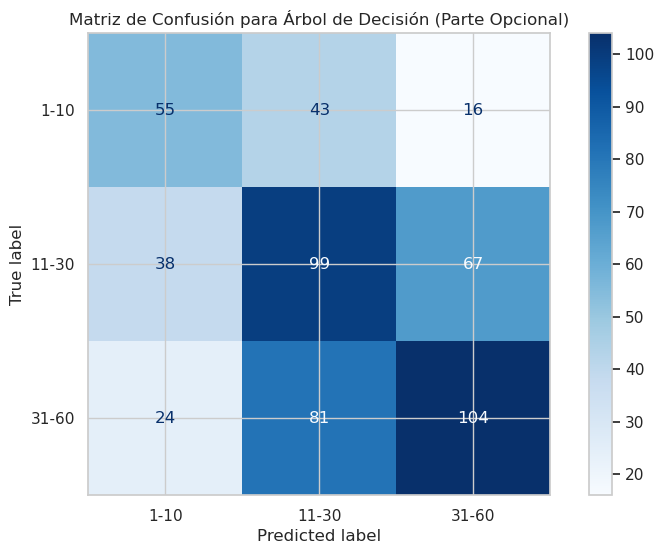

In [268]:
# entrenar
decision_tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')
decision_tree.fit(X_train, y_train)

# Predicciones
y_pred = decision_tree.predict(X_test)

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=['1-10', '11-30', '31-60']).plot(cmap='Blues')
plt.title("Matriz de Confusión para Árbol de Decisión (Parte Opcional)")
plt.show()


#### Reporte de Clasificación:
- **Clase 1-10 (0)**: 
  - Precisión y recall moderados (~47%).
  - El modelo tiene dificultades diferenciando esta clase.
- **Clase 11-30 (1)**: 
  - Similar desempeño, con recall del 49% pero precisión más baja.
- **Clase 31-60 (2)**: 
  - Ligeramente mejor, con un f1-score de 0.53.

#### Matriz de Confusión:
- Muchas confusiones entre **11-30** y **31-60**, lo que indica que el modelo no distingue bien entre las rondas posteriores.
- La clase **1-10** tiene más aciertos, pero sigue confundida con los rangos superiores.

#### Conclusión:
- El modelo no clasifica bien los rangos del draft. Esto puede deberse a la similitud entre los jugadores en estos grupos.
